# Analysis of results 

In [1]:
cd ~/thesis/

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Initial processing

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import ast

from analysis_utils import *

/tmp/ipykernel_324/70208650.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
results_df = pd.read_csv('results.csv')

In [4]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'parameters': '(128, 80, 160, 4, 4)',
          'num_different_nodes': 512}

In [5]:
sub_df = accu_time_df_gen(results_df, config)

In [12]:
# Calculate the average accuracy difference
avg_accuracy_diff_perc = 100* (abs(sub_df.loc[0, 'average_accuracy'] - sub_df.loc[1, 'average_accuracy']) / sub_df.loc[0, 'average_accuracy'])

# Calculate the training time difference
training_time_diff_perc = 100* (abs(sub_df.loc[0, 'training_time'] - sub_df.loc[1, 'training_time'])) / sub_df.loc[0, 'training_time']

In [13]:
avg_accuracy_diff_perc, training_time_diff_perc

(1.006230422861552, 69.9747829843204)

### Hyperparameter tuning

In [14]:
# Should have been 300 (?)
all_parameters = list(results_df['parameters'].unique())
len(all_parameters)

371

In [84]:
# all_parameters = [ast.literal_eval(param_str) for param_str in all_parameters]

D = set()
R = set()
L = set()
P = set()
Q = set()


for param in all_parameters:
    d, r, l, p, q = param
    D.add(d)
    R.add(r)
    L.add(l)
    P.add(p)
    Q.add(q)


D, R, L, P, Q

ValueError: too many values to unpack (expected 5)

#### Cora

In [108]:
config = {'dataset': 'cora',
        #   'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}

In [109]:
cora_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

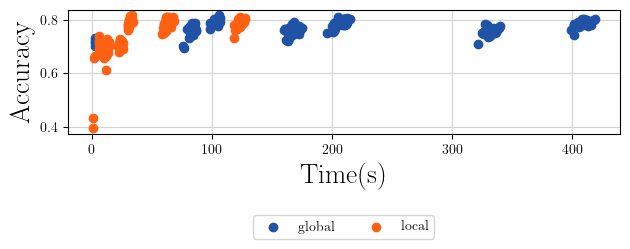

In [110]:
accu_time_plot(cora_df)

In [88]:
# sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
cora_df.sort_values(by='average_accuracy', ascending=False).head(15)

cora,dataset,retraining_type,parameters,dynamic_update,removal_process,average_accuracy,training_time
91,cora,local,"(128, 40, 80, 2, 1)",extend,random,0.816479,33.817051
74,cora,global,"(128, 40, 80, 4, 2)",extend,random,0.816394,105.576616
111,cora,local,"(128, 40, 80, 0.25, 0.25)",extend,random,0.812863,31.953484
315,cora,local,"(128, 40, 160, 1, 1)",extend,random,0.811209,62.478489
299,cora,local,"(128, 40, 160, 2, 0.5)",extend,random,0.810902,63.524729
235,cora,local,"(128, 80, 80, 1, 0.25)",extend,random,0.810208,64.816080
219,cora,local,"(128, 80, 80, 4, 0.25)",extend,random,0.810062,67.367942
183,cora,local,"(128, 80, 160, 0.5, 1)",extend,random,0.809882,123.806995
262,cora,global,"(128, 80, 80, 0.25, 0.25)",extend,random,0.809080,204.833654
335,cora,local,"(128, 40, 160, 0.5, 1)",extend,random,0.808739,61.532741


In [89]:
cora_df.loc[cora_df['retraining_type'] == 'global']

cora,dataset,retraining_type,parameters,dynamic_update,removal_process,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.692879,76.708406
2,cora,global,"(128, 40, 80, 0.25, 1)",extend,degree_centrality,0.788107,100.880492
4,cora,global,"(128, 40, 80, 0.25, 1)",prune,betweenness_centrality,0.701802,75.814420
6,cora,global,"(128, 40, 80, 0.25, 1)",extend,betweenness_centrality,0.784075,102.646673
8,cora,global,"(128, 40, 80, 0.25, 1)",prune,random,0.750689,81.678901
...,...,...,...,...,...,...,...
406,cora,global,"(128, 40, 80, 0.5, 0.25)",extend,random,0.785540,104.126992
408,cora,global,"[64, 8, 8, 0.25, 4]",prune,random,0.711445,2.311835
410,cora,global,"[64, 8, 8, 0.25, 4]",extend,random,0.719772,3.050927
412,cora,global,"[64, 8, 8, 0.25, 4]",prune,random,0.701516,2.295618


In [90]:
temp_df = cora_df.loc[cora_df['retraining_type'] == 'global']
dict(temp_df.iloc[temp_df['average_accuracy'].argmax()])

{'dataset': 'cora',
 'retraining_type': 'global',
 'parameters': '(128, 40, 80, 4, 2)',
 'dynamic_update': 'extend',
 'removal_process': 'random',
 'average_accuracy': 0.8163936506487652,
 'training_time': 105.576616048813}

#### Wikipedia 

In [91]:
config = {'dataset': 'wikipedia',
        #   'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}


In [92]:
wiki_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

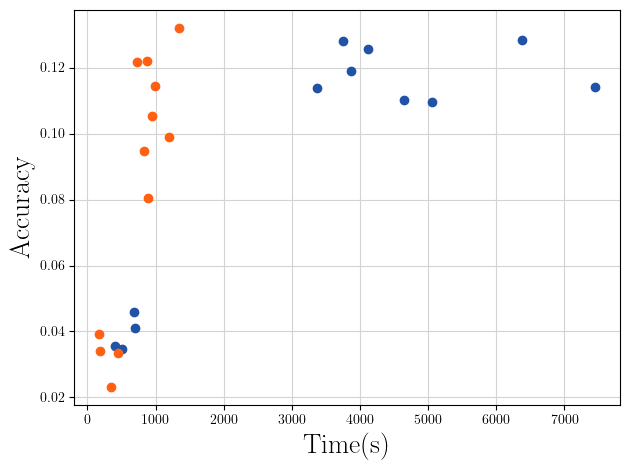

In [93]:
accu_time_plot(wiki_df)

In [94]:
temp_df = wiki_df.loc[wiki_df['retraining_type'] == 'global']
dict(temp_df.iloc[wiki_df['average_accuracy'].argmax()])

IndexError: single positional indexer is out-of-bounds

#### PPI

In [95]:
config = {'dataset': 'PPI',
          'metric': 'macro',
          'num_different_nodes': 512}

In [96]:
ppi_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

In [97]:
# sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
ppi_df.sort_values(by='average_accuracy', ascending=False).head(15)

PPI,dataset,retraining_type,parameters,dynamic_update,removal_process,average_accuracy,training_time
14,PPI,global,"(128, 80, 80, 0.25, 1)",prune,random,0.103920,658.539948
93,PPI,local,"(128, 40, 80, 2, 1)",extend,random,0.103872,103.184063
46,PPI,global,"(128, 80, 80, 2, 1)",prune,random,0.103022,664.677804
78,PPI,global,"(128, 40, 80, 4, 1)",prune,random,0.101758,343.939501
33,PPI,local,"(128, 80, 80, 4, 2)",extend,random,0.101657,172.781480
37,PPI,local,"(128, 80, 80, 4, 1)",extend,random,0.101450,167.833059
6,PPI,global,"(128, 40, 80, 0.25, 1)",prune,random,0.099995,333.163013
34,PPI,global,"(128, 80, 80, 4, 1)",prune,random,0.099235,659.021818
42,PPI,global,"(128, 80, 80, 2, 2)",prune,random,0.099116,673.238465
53,PPI,local,"(128, 80, 80, 1, 4)",extend,random,0.098656,174.081321


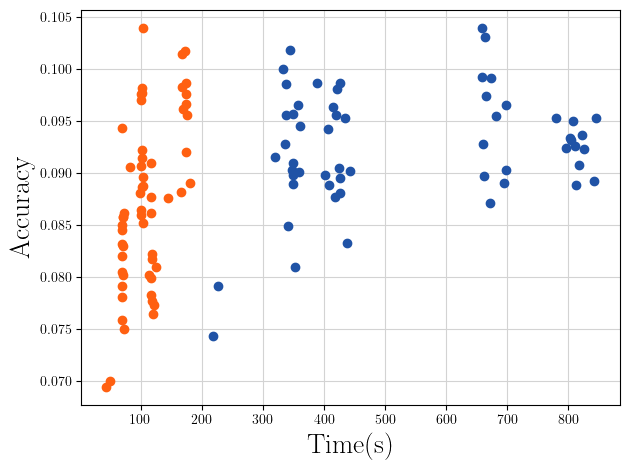

In [98]:
accu_time_plot(ppi_df)

In [99]:
temp_df = ppi_df.loc[ppi_df['retraining_type'] == 'global']
dict(temp_df.iloc[temp_df['average_accuracy'].argmax()])

{'dataset': 'PPI',
 'retraining_type': 'global',
 'parameters': '(128, 80, 80, 0.25, 1)',
 'dynamic_update': 'prune',
 'removal_process': 'random',
 'average_accuracy': 0.10392025126642672,
 'training_time': 658.539947986603}

#### BlogCatalog

In [100]:
config = {'dataset': 'blog_catalog',
        # 'dynamic_update': 'extend',
        'metric': 'macro',
        'num_different_nodes': 512}

In [101]:
blog_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)
# sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
blog_df.sort_values(by='average_accuracy', ascending=False).head(15)

blog_catalog,dataset,retraining_type,parameters,dynamic_update,removal_process,average_accuracy,training_time
2,blog_catalog,global,"(128, 40, 80, 0.25, 1)",extend,random,0.206375,4956.535452
5,blog_catalog,local,"(128, 40, 80, 0.25, 1)",extend,random,0.204560,1466.205247
0,blog_catalog,global,"(128, 40, 80, 0.25, 1)",prune,random,0.204061,4434.546483
10,blog_catalog,global,"(128, 80, 80, 0.25, 1)",prune,random,0.203846,7917.033863
9,blog_catalog,local,"(128, 40, 80, 0.25, 1)",extend,random,0.203679,1459.789268
6,blog_catalog,global,"(128, 40, 80, 0.25, 1)",prune,random,0.203380,4254.954576
13,blog_catalog,local,"(128, 80, 80, 0.25, 1)",extend,random,0.202358,1724.187371
4,blog_catalog,global,"(128, 40, 80, 0.25, 1)",extend,random,0.201024,5098.421046
12,blog_catalog,global,"(128, 80, 80, 0.25, 1)",extend,random,0.198858,8798.809094
1,blog_catalog,local,"(128, 40, 80, 0.25, 1)",prune,random,0.198408,1480.310039


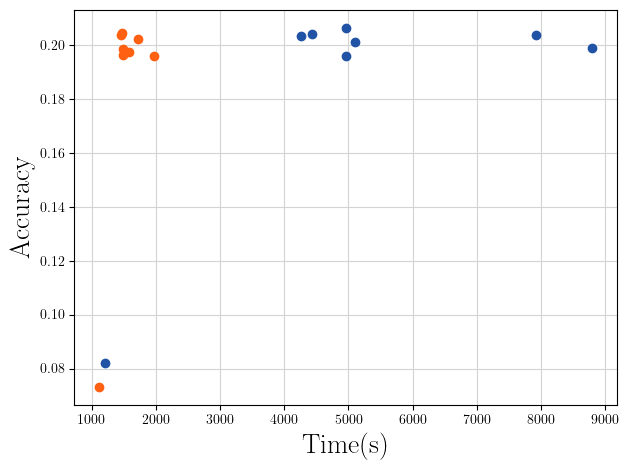

In [102]:
accu_time_plot(blog_df)

In [103]:
from functools import reduce

In [104]:
cora_df['parameters']

0      (128, 40, 80, 0.25, 1)
1      (128, 40, 80, 0.25, 1)
2      (128, 40, 80, 0.25, 1)
3      (128, 40, 80, 0.25, 1)
4      (128, 40, 80, 0.25, 1)
                ...          
411       [64, 8, 8, 0.25, 4]
412       [64, 8, 8, 0.25, 4]
413       [64, 8, 8, 0.25, 4]
414       [64, 8, 8, 0.25, 4]
415       [64, 8, 8, 0.25, 4]
Name: parameters, Length: 416, dtype: object

In [105]:
dfs = [blog_df, ppi_df, ppi_df]


dfs = [df[df['retraining_type'] == 'local'] for df in dfs]
top_n = 10

# Get the top N values from the column of interest for each dataframe
top_values = [df.sort_values(by='average_accuracy', ascending=False).head(top_n)['parameters'].to_list() for df in dfs]

# Find the intersection of the top values
intersection = reduce(lambda x, y: set(x).intersection(y), top_values)

# Convert the intersection to a list (optional)
common_values = list(intersection)

print(common_values)

['(128, 40, 80, 0.25, 1)']


In [106]:
top_values

[['(128, 40, 80, 0.25, 1)',
  '(128, 40, 80, 0.25, 1)',
  '(128, 80, 80, 0.25, 1)',
  '(128, 40, 80, 0.25, 1)',
  '(128, 40, 80, 0.25, 1)',
  '(128, 40, 80, 0.25, 1)',
  '(128, 80, 80, 0.25, 1)',
  '[64, 8, 8, 0.25, 4]'],
 ['(128, 40, 80, 2, 1)',
  '(128, 80, 80, 4, 2)',
  '(128, 80, 80, 4, 1)',
  '(128, 80, 80, 1, 4)',
  '(128, 80, 80, 1, 1)',
  '(128, 40, 80, 4, 4)',
  '(128, 40, 80, 4, 2)',
  '(128, 40, 80, 0.25, 1)',
  '(128, 80, 80, 2, 4)',
  '(128, 40, 80, 0.25, 0.25)'],
 ['(128, 40, 80, 2, 1)',
  '(128, 80, 80, 4, 2)',
  '(128, 80, 80, 4, 1)',
  '(128, 80, 80, 1, 4)',
  '(128, 80, 80, 1, 1)',
  '(128, 40, 80, 4, 4)',
  '(128, 40, 80, 4, 2)',
  '(128, 40, 80, 0.25, 1)',
  '(128, 80, 80, 2, 4)',
  '(128, 40, 80, 0.25, 0.25)']]

## Table of results for specific dataset

In [6]:
perc_list = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']

In [7]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'parameters': '(128, 40, 80, 4, 2)',
          'num_different_nodes': 512}

In [8]:
table_df = table_df_gen(results_df, config)

In [9]:
dict(sub_df.iloc[sub_df['average_accuracy'].argmax()])

{'dataset': 'cora',
 'retraining_type': 'global',
 'parameters': '(128, 80, 160, 4, 4)',
 'dynamic_update': 'extend',
 'removal_process': 'random',
 'average_accuracy': 0.7906122755311733,
 'training_time': 415.683768033981}

In [ ]:
np.arange(0.1, 1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
# Filter the DataFrame for 'macro' and 'micro' scores
macro_df = table_df[table_df['metric'] == 'macro']
micro_df = table_df[table_df['metric'] == 'micro']

# X-axis values
x_values = 1 - np.arange(0.1, 1, 0.1)

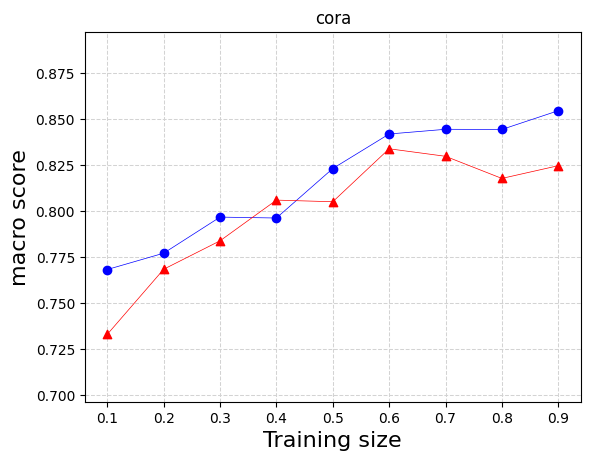

In [ ]:
# Plot for macro scores
table_scores_plot(macro_df, 'macro')

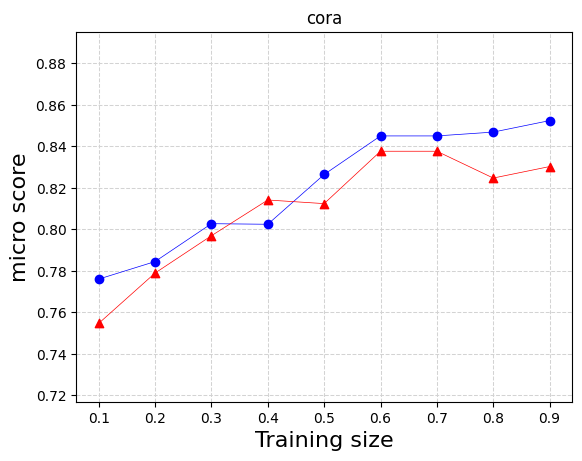

In [ ]:
# Plot for macro scores
table_scores_plot(micro_df, 'micro')

In [12]:
table_df

wikipedia,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,...,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,removal_process,execution_timestamp
4,wikipedia,4777,92517,global,macro,0.070454,0.094191,0.098199,0.118037,0.128328,...,0.156230,0.152185,0.177443,"(128, 40, 80, 0.25, 1)",4115.748518,extend,512,512,random,13/06/2024 - 13:29
5,wikipedia,4777,92517,global,micro,0.493023,0.524856,0.538876,0.545169,0.545416,...,0.555091,0.555439,0.541841,"(128, 40, 80, 0.25, 1)",4115.748518,extend,512,512,random,13/06/2024 - 13:29
6,wikipedia,4777,92517,local,macro,0.068397,0.088862,0.098758,0.100617,0.112384,...,0.163243,0.146401,0.178086,"(128, 40, 80, 0.25, 1)",880.233272,extend,512,512,random,13/06/2024 - 13:29
7,wikipedia,4777,92517,local,micro,0.459302,0.515960,0.540670,0.541681,0.539138,...,0.552999,0.537657,0.520921,"(128, 40, 80, 0.25, 1)",880.233272,extend,512,512,random,13/06/2024 - 13:29


In [14]:
# These are the parameters for calculating the gloal/local difference
config = {'parameters': '(128, 40, 80, 0.25, 1)',
         'num_different_nodes': 512,
         'dynamic_update': 'extend'}

dfs = []
dataset_names = ['PPI', 'blog_catalog', 'cora', 'wikipedia']

for dataset in dataset_names:

    config['dataset'] = dataset

    table_df = table_df_gen(results_df, config)

    # Limit to random only
    table_df = table_df[table_df['removal_process'] == 'random']

    dfs.append(table_df)

dfs[0] = dfs[0][:4]
dfs[1] = dfs[1][:4]

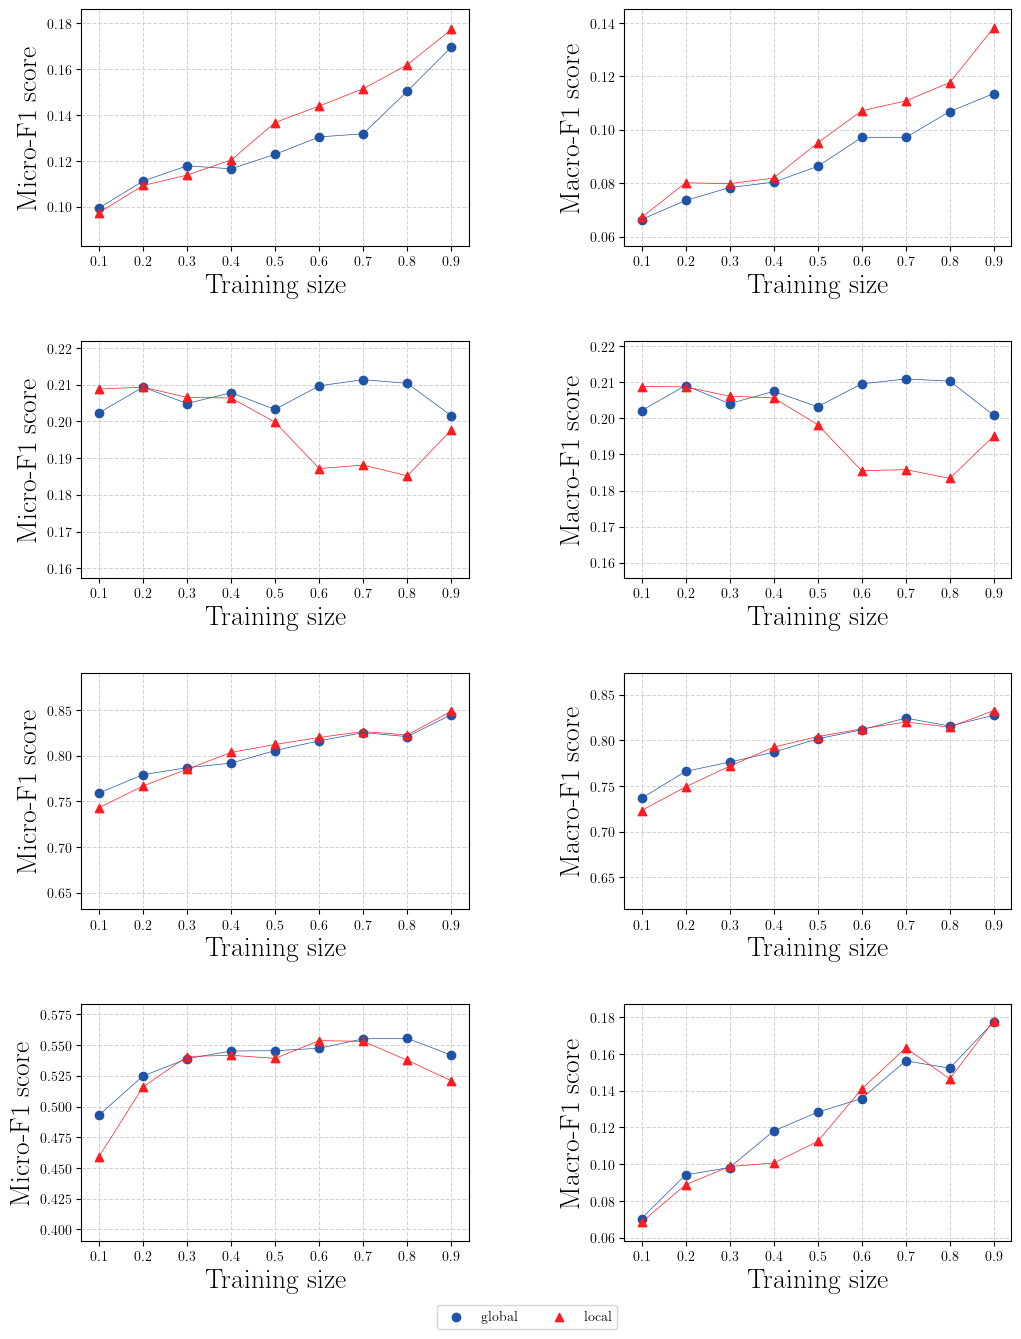

In [19]:
exp_table_scores_plot(dfs, dataset_names)

## Graphs 

In [6]:
speed_df = sub_df.copy()

In [7]:
speed_df.sort_values(by='average_accuracy', ascending=False).head(30)['parameters']

0    (128, 80, 160, 4, 4)
1    (128, 80, 160, 4, 4)
Name: parameters, dtype: object

In [8]:
# Function to convert string to tuple and extract required elements
def extract_elements(param_str):
    tuple_obj = ast.literal_eval(param_str)
    return tuple_obj[1], tuple_obj[2]

# Apply the function to the 'parameters' column and create new columns
speed_df[['walk_length', 'walks_num']] = speed_df['parameters'].apply(lambda x: pd.Series(extract_elements(x)))

In [9]:
speed_df.tail(8)

,dataset,retraining_type,parameters,dynamic_update,removal_process,average_accuracy,training_time,walk_length,walks_num
0,cora,global,"(128, 80, 160, 4, 4)",extend,random,0.790612,415.683768,80,160
1,cora,local,"(128, 80, 160, 4, 4)",extend,random,0.782657,124.809953,80,160


In [10]:
speed_df = speed_df.loc[speed_df['walk_length'] != 8]

In [11]:
speed_df['walk_length'].unique()

array([80])

In [12]:
global_speed_df = speed_df.loc[speed_df['retraining_type'] == 'global']
local_speed_df = speed_df.loc[speed_df['retraining_type'] == 'local']

In [13]:
global_speed_df

,dataset,retraining_type,parameters,dynamic_update,removal_process,average_accuracy,training_time,walk_length,walks_num
0,cora,global,"(128, 80, 160, 4, 4)",extend,random,0.790612,415.683768,80,160


In [14]:
global_speed_df.loc[global_speed_df['walk_length'] == 80, 'training_time'].mean()

415.683768033981

In [15]:
local_speed_df.loc[local_speed_df['walk_length'] == 80, 'training_time'].mean()


124.809953451157

In [16]:
global_speed_df.loc[global_speed_df['walk_length'] == 40, 'training_time'].mean()

nan

In [17]:
local_speed_df.loc[local_speed_df['walk_length'] == 40, 'training_time'].mean()

nan

## One parameter set evaluation 

In [18]:
param_df = results_df.loc[results_df['parameters'] == '(128, 40, 80, 0.25, 1)']

In [19]:
# These are the parameters for calculating the gloal/local difference
config = {'parameters': '(128, 40, 80, 0.25, 1)',
          'metric': 'macro',
          'num_different_nodes': 512}

all_stats_dict = {'extend': {}, 'prune': {}}

for dynamic_update in all_stats_dict:

    for dataset in param_df['dataset'].unique():
        
        config['dataset'] = dataset
        sub_df = accu_time_df_gen(param_df, config)

        # if dynamic_update in list(sub_df['dynamic_update']):
        dynamic_df = sub_df[sub_df['dynamic_update'] == dynamic_update]
        dynamic_df = dynamic_df.reset_index(drop=True)

        #  # Calculate the average accuracy difference
        # avg_accuracy_diff_perc = 100 * (abs(dynamic_df.loc[0, 'average_accuracy'] - dynamic_df.loc[1, 'average_accuracy']) / dynamic_df.loc[0, 'average_accuracy'])

        # # Calculate the training time difference
        # training_time_diff_perc = 100 * (abs(dynamic_df.loc[0, 'training_time'] - dynamic_df.loc[1, 'training_time'])) / dynamic_df.loc[0, 'training_time']

        # Calculate the average accuracy difference
        avg_accuracy_diff_perc = (abs(dynamic_df.loc[0, 'average_accuracy'] - dynamic_df.loc[1, 'average_accuracy']) / dynamic_df.loc[0, 'average_accuracy'])

        # Calculate the training time difference
        training_time_diff_perc = (abs(dynamic_df.loc[0, 'training_time'] - dynamic_df.loc[1, 'training_time'])) / dynamic_df.loc[0, 'training_time']

        all_stats_dict[dynamic_update].update({dataset: (avg_accuracy_diff_perc, training_time_diff_perc)})


In [1]:
all_stats_dict

NameError: name 'all_stats_dict' is not defined

In [21]:
'prune' in list(sub_df['dynamic_update'])

True

In [22]:
sub_df = accu_time_df_gen(param_df, config)
sub_df

,dataset,retraining_type,parameters,dynamic_update,removal_process,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.692879,76.708406
1,cora,local,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.613932,11.665169
2,cora,global,"(128, 40, 80, 0.25, 1)",extend,degree_centrality,0.788107,100.880492
3,cora,local,"(128, 40, 80, 0.25, 1)",extend,degree_centrality,0.781914,30.449891
4,cora,global,"(128, 40, 80, 0.25, 1)",prune,betweenness_centrality,0.701802,75.814420
5,cora,local,"(128, 40, 80, 0.25, 1)",prune,betweenness_centrality,0.658202,9.899643
6,cora,global,"(128, 40, 80, 0.25, 1)",extend,betweenness_centrality,0.784075,102.646673
7,cora,local,"(128, 40, 80, 0.25, 1)",extend,betweenness_centrality,0.787830,32.030649
8,cora,global,"(128, 40, 80, 0.25, 1)",prune,random,0.750689,81.678901
9,cora,local,"(128, 40, 80, 0.25, 1)",prune,random,0.697438,6.561523


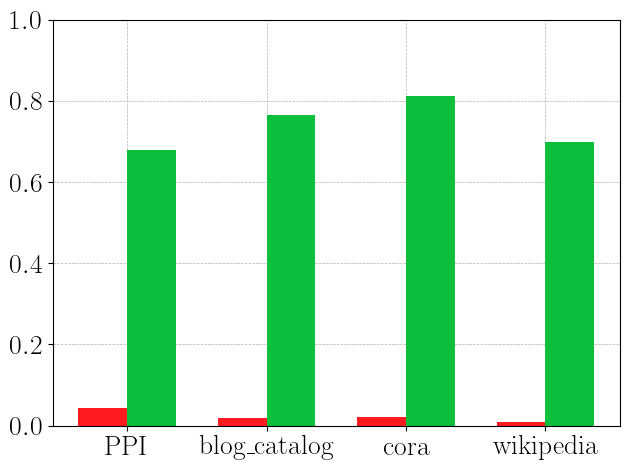

In [80]:
dynamic_update = 'extend'
stats_dict = all_stats_dict[dynamic_update]

accu_speedup_dataset_plot(all_stats_dict, dynamic_update)

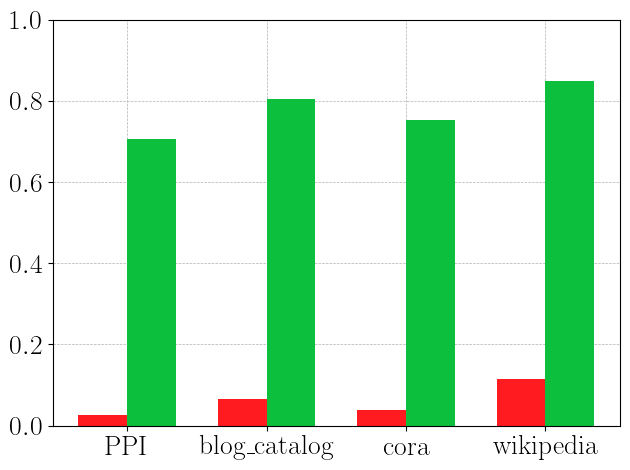

In [76]:
dynamic_update = 'prune'
stats_dict = all_stats_dict[dynamic_update]

accu_speedup_dataset_plot(all_stats_dict, dynamic_update)

## Walk length

In [40]:
all_dataset_walk_dict = dataset_walk_scores_gen(results_df, 'extend')
all_dataset_walk_dict

{'blog_catalog': {40.0: [0.201524007815397, 3256.033997217815],
  80.0: [0.20060781264196575, 5261.498232364655]},
 'wikipedia': {40.0: [0.11597638457821292, 2653.277732104063],
  80.0: [0.12305040023738104, 4396.736878275875]},
 'PPI': {40.0: [0.09202691540289733, 257.8922663256526],
  80.0: [0.09393444069159347, 492.3110450108846]},
 'cora': {40.0: [0.7912552550078312, 99.58286873881633],
  80.0: [0.7900403366123152, 201.27813012838362]}}

In [41]:
all_dataset_walk_dict = dataset_walk_scores_gen(results_df, 'prune')
all_dataset_walk_dict

{'blog_catalog': {40.0: [0.20027803238289535, 3107.896535793942],
  80.0: [0.19999769708238824, 4940.151242733005]},
 'wikipedia': {40.0: [0.07216420081377814, 1321.0635981559756],
  80.0: [0.11365675285922053, 3785.294533967975]},
 'PPI': {40.0: [0.08601274493372534, 198.97648096084598],
  80.0: [0.08845783844683341, 396.1347808539868]},
 'cora': {40.0: [0.7329718749986349, 66.44138810497063],
  80.0: [0.7333733544507433, 134.51013869524004]}}

From these results we have similar accuracy but half training time with half walk length (for cora)

In [42]:
np.mean(all_df[all_df['walk_length'] == 40]['average_accuracy'])

NameError: name 'all_df' is not defined

In [ ]:
np.mean(all_df[all_df['walk_length'] == 80]['average_accuracy'])

0.7900403366123153

In [ ]:
np.mean(all_df[all_df['walk_length'] == 40]['training_time'])

100.90610643863675

In [ ]:
np.mean(all_df[all_df['walk_length'] == 80]['training_time'])

201.27813012838368

In [ ]:
# fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# # Bar plot for Accuracy
# sns.barplot(ax=axes[0], data=df.melt(id_vars=['Dataset'], value_vars=['Walk Length 1 Accuracy', 'Walk Length 2 Accuracy']),
#             x='Dataset', y='value', hue='variable')
# axes[0].set_title('Accuracy by Dataset and Walk Length')
# axes[0].set_ylabel('Accuracy')
# axes[0].set_xlabel('')

# # Bar plot for Time
# sns.barplot(ax=axes[1], data=df.melt(id_vars=['Dataset'], value_vars=['Walk Length 1 Time', 'Walk Length 2 Time']),
#             x='Dataset', y='value', hue='variable')
# axes[1].set_title('Time by Dataset and Walk Length')
# axes[1].set_ylabel('Time')
# axes[1].set_xlabel('Dataset')

# plt.tight_layout()
# plt.show()


{'blog_catalog': {40.0: [0.201524007815397, 3256.033997217815],
  80.0: [0.20060781264196575, 5261.498232364655]},
 'wikipedia': {40.0: [0.11597638457821292, 2653.277732104063],
  80.0: [0.12305040023738104, 4396.736878275875]},
 'PPI': {40.0: [0.09202691540289733, 257.8922663256526],
  80.0: [0.09393444069159347, 492.3110450108846]},
 'cora': {40.0: [0.7912552550078312, 99.58286873881633],
  80.0: [0.7900403366123152, 201.27813012838362]}}

In [88]:
dynamic_update = 'extend'

all_dataset_walk_dict = dataset_walk_scores_gen(results_df, dynamic_update)
all_dataset_walk_dict

{'blog_catalog': {40.0: [0.201524007815397, 3256.033997217815],
  80.0: [0.20060781264196575, 5261.498232364655]},
 'wikipedia': {40.0: [0.11597638457821292, 2653.277732104063],
  80.0: [0.12305040023738104, 4396.736878275875]},
 'PPI': {40.0: [0.09202691540289733, 257.8922663256526],
  80.0: [0.09393444069159347, 492.3110450108846]},
 'cora': {40.0: [0.7912552550078312, 99.58286873881633],
  80.0: [0.7900403366123152, 201.27813012838362]}}

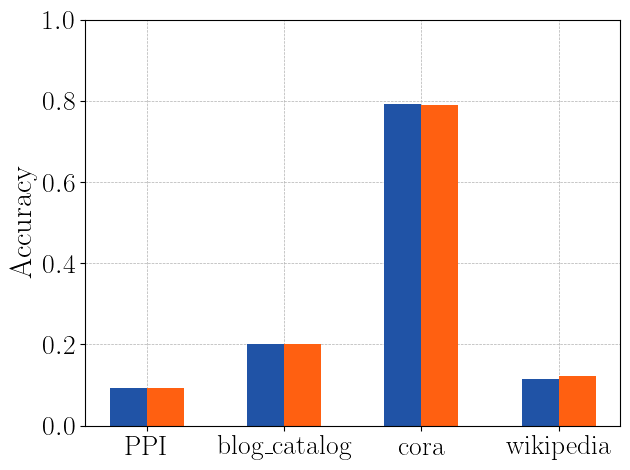

In [89]:
dataset_walk_plot(dynamic_update, 'accuracy', all_dataset_walk_dict)

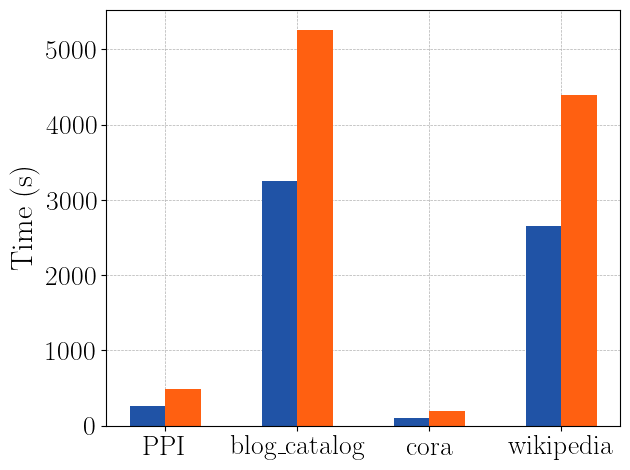

In [83]:
dataset_walk_plot(dynamic_update, 'time', all_dataset_walk_dict)

In [90]:
dynamic_update = 'prune'

all_dataset_walk_dict = dataset_walk_scores_gen(results_df, dynamic_update)
all_dataset_walk_dict


{'blog_catalog': {40.0: [0.20027803238289535, 3107.896535793942],
  80.0: [0.19999769708238824, 4940.151242733005]},
 'wikipedia': {40.0: [0.07216420081377814, 1321.0635981559756],
  80.0: [0.11365675285922053, 3785.294533967975]},
 'PPI': {40.0: [0.08601274493372534, 198.97648096084598],
  80.0: [0.08845783844683341, 396.1347808539868]},
 'cora': {40.0: [0.7329718749986349, 66.44138810497063],
  80.0: [0.7333733544507433, 134.51013869524004]}}

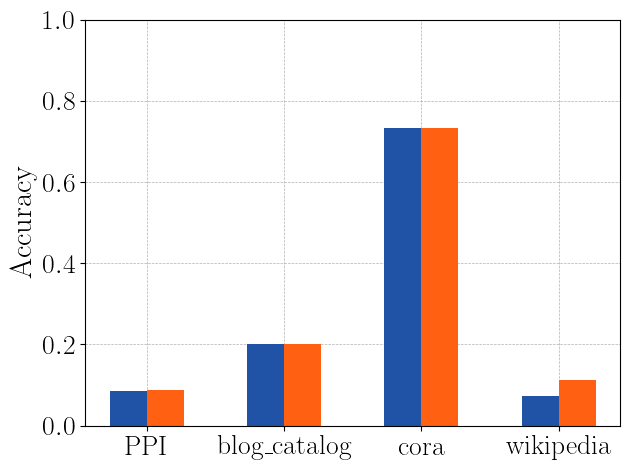

In [91]:
dataset_walk_plot(dynamic_update, 'accuracy', all_dataset_walk_dict)

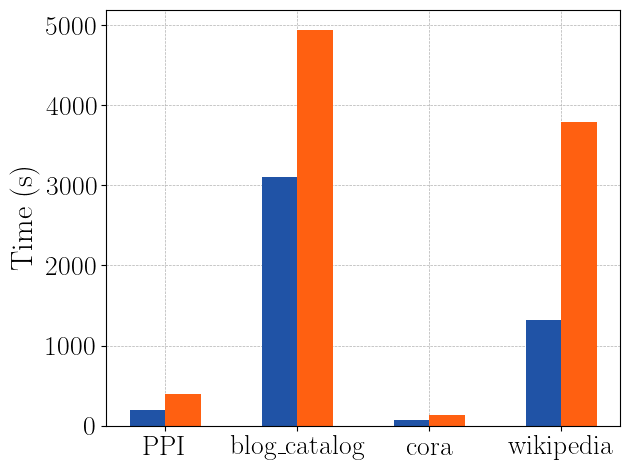

In [86]:
dataset_walk_plot(dynamic_update, 'time', all_dataset_walk_dict)

## Centrality

In [4]:
results_df.head()

,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,...,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,removal_process,execution_timestamp
0,PPI,3890,38739,global,macro,0.117919,0.123484,0.120631,0.109218,0.101414,...,0.092165,0.070849,0.061516,"(128, 40, 80, 0.25, 1)",333.163013,prune,512,2227,betweenness_centrality,11/07/2024 - 20:15
1,PPI,3890,38739,global,micro,0.180473,0.184911,0.166667,0.154586,0.137951,...,0.131924,0.107658,0.098323,"(128, 40, 80, 0.25, 1)",333.163013,prune,512,2227,betweenness_centrality,11/07/2024 - 20:15
2,PPI,3890,38739,local,macro,0.091723,0.084281,0.094639,0.091126,0.081769,...,0.071375,0.065970,0.051746,"(128, 40, 80, 0.25, 1)",68.855529,prune,512,2227,betweenness_centrality,11/07/2024 - 20:15
3,PPI,3890,38739,local,micro,0.136986,0.135802,0.139854,0.128944,0.119649,...,0.103881,0.096022,0.077744,"(128, 40, 80, 0.25, 1)",68.855529,prune,512,2227,betweenness_centrality,11/07/2024 - 20:15
4,PPI,3890,38739,global,macro,0.113568,0.106821,0.097135,0.097138,0.086269,...,0.078349,0.073512,0.066392,"(128, 40, 80, 0.25, 1)",407.610555,extend,512,512,betweenness_centrality,11/07/2024 - 20:01


In [21]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'PPI',
          'dynamic_update': 'prune',
          'metric': 'macro',
          'parameters': '(128, 40, 80, 0.25, 1)'}

In [22]:
sub_df = results_df.copy()

for key in config:
    sub_df = sub_df[sub_df.loc[:, key] == config[key]]

In [23]:
sub_df

,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,...,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,removal_process,execution_timestamp
0,PPI,3890,38739,global,macro,0.117919,0.123484,0.120631,0.109218,0.101414,...,0.092165,0.070849,0.061516,"(128, 40, 80, 0.25, 1)",333.163013,prune,512,2227,betweenness_centrality,11/07/2024 - 20:15
2,PPI,3890,38739,local,macro,0.091723,0.084281,0.094639,0.091126,0.081769,...,0.071375,0.065970,0.051746,"(128, 40, 80, 0.25, 1)",68.855529,prune,512,2227,betweenness_centrality,11/07/2024 - 20:15
256,PPI,3890,38739,global,macro,0.100238,0.102293,0.089567,0.097844,0.088332,...,0.075928,0.066621,0.054594,"(128, 40, 80, 0.25, 1)",341.050711,prune,512,2227,random,12/06/2024 - 17:53
258,PPI,3890,38739,local,macro,0.079820,0.070594,0.080996,0.087415,0.087862,...,0.075724,0.068366,0.055067,"(128, 40, 80, 0.25, 1)",69.428200,prune,512,2227,random,12/06/2024 - 17:53
